In [1]:
import requests  # Import the requests library
import pandas as pd  # Import the pandas library

# TODO: Define minimum and maximum latitudes for Colima, Michoacán, and Guerrero
# Define the parameters for the API request
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"  # Base URL for the USGS Earthquake API
params = {
    "format": "geojson",  # Request the data in GeoJSON format
    "starttime": "2019-01-15",  # Start date for the data query
    "endtime": "2025-01-15",    # End date for the data query
    # "minmagnitude":5.0,       # Minimum magnitude (optional, currently commented)
    "orderby": "magnitude",     # Sort the results by magnitude
    # "orderby":"time",         # Alternative sorting by time (commented)
    "minlatitude": 17.5,        # Limit the region to the southern boundary of Mexico
    "maxlatitude": 20.0,        # Limit the region to the northern boundary of Mexico
    "minlongitude": -104.5,     # Limit the region to the western edge of the Cocos Plate
    "maxlongitude": -100.0,     # Limit the region to the eastern edge
    "minmagnitude": 4.0         # Include significant earthquakes
}

# Make the API request
response = requests.get(url, params=params)  # Perform a GET request to fetch the data
data = response.json()  # Parse the JSON response into a Python dictionary

# Process the data
df = pd.json_normalize(data['features'])  # Normalize the GeoJSON data into a pandas DataFrame
df['time'] = pd.to_datetime(df['properties.time'], unit='ms')  # Convert the time from milliseconds to datetime
df = df[['time', 'properties.mag', 'geometry.coordinates']]  # Select relevant columns
df.columns = ['Time', 'Magnitude', 'Coordinates']  # Rename the columns for clarity

# Display a summary
print(df.head(30))  # Print the first 30 rows of the new DataFrame



                      Time  Magnitude                   Coordinates
0  2022-09-19 18:05:08.217        7.6  [-102.9561, 18.4552, 26.943]
1  2022-09-22 06:16:09.459        6.8      [-102.9554, 18.2633, 20]
2  2025-01-12 08:32:50.161        6.2      [-103.3158, 18.5249, 34]
3  2022-09-20 08:17:10.977        5.8      [-103.6243, 18.3487, 16]
4  2022-09-19 19:30:39.868        5.3      [-103.8147, 18.4778, 10]
5  2022-09-23 18:25:59.283        5.2  [-103.6506, 18.5021, 41.467]
6  2022-08-12 08:17:26.497        5.2  [-100.8797, 18.4823, 71.653]
7  2023-07-16 13:44:34.199        5.1   [-100.8784, 18.3051, 62.74]
8  2019-06-16 17:25:23.138        5.1   [-101.7714, 18.5738, 60.71]
9  2019-03-03 15:25:53.559        5.1   [-101.4137, 18.4451, 49.22]
10 2022-04-19 12:44:08.076        5.0    [-101.864, 17.8597, 17.55]
11 2021-05-11 04:37:08.861        5.0   [-102.7126, 18.7614, 57.79]
12 2021-07-29 23:04:40.999        4.9    [-102.6613, 17.9541, 17.2]
13 2022-09-20 10:43:16.791        4.9   [-103.02

With the API: "Earthquake USGS" service provided by the U.S. government, we can easily retrieve earthquake data from around the world. To achieve this, we need to import the requests library for making API calls and pandas for data analysis and processing.

We can adjust the minimum magnitude parameter to filter earthquakes based on their intensity. Additionally, we can sort the displayed information either by magnitude or by time.

In this case, we are analyzing the region consisting of Colima, Michoacán, and Guerrero, which are the states in Mexico closest to the Cocos Plate and experience the highest number of earthquakes annually.

You can refer to the API documentation for more information, including the available file formats. In this case, we are using the geojson format, but other formats such as kml, xml, and simple text are also available. 

In [2]:
import folium

# Create a base map centered on Mexico
m = folium.Map(location=[16.0, -95.0], zoom_start=6)

# Add markers for the earthquakes
for _, row in df.iterrows():
    coords = row['Coordinates']
    folium.CircleMarker(
        location=[coords[1], coords[0]],  # Swap for latitude and longitude
        radius=row['Magnitude'] * 2,  # Size based on magnitude
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Display the map
m



Here, we are importing the `folium` library to create interactive maps. This library allows us to easily add markers and visualize earthquake data. We can add a circle marker for each earthquake, where the size of the circle is based on the earthquake's magnitude. This makes it easier to visualize and understand the distribution and intensity of seismic activity on the map.


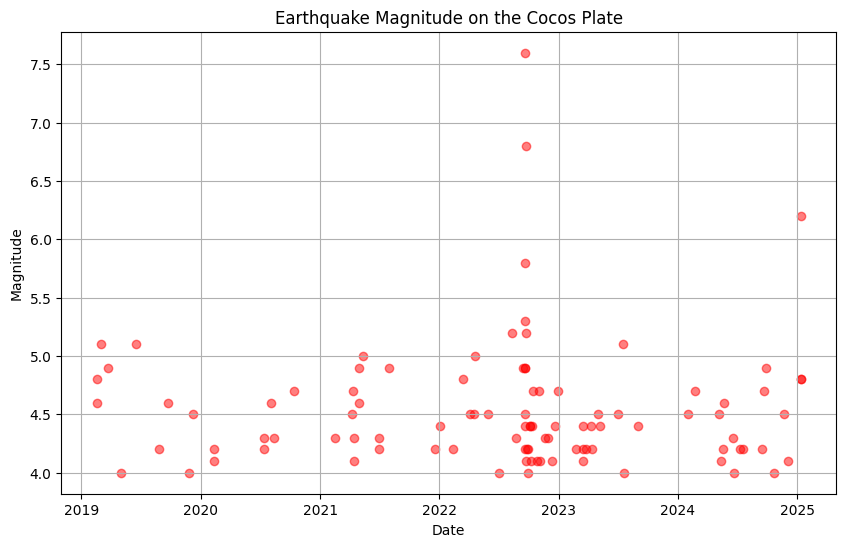

In [3]:
import matplotlib.pyplot as plt

# Magnitude vs Time plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Magnitude'], alpha=0.5, color='red')
plt.title("Earthquake Magnitude on the Cocos Plate")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.grid()
plt.show()



This part of the code uses `matplotlib` to create a scatter plot showing earthquake magnitudes over time. The plot is displayed with the time on the x-axis and the magnitude on the y-axis. The data points are represented in red, and the plot includes a title, axis labels, and a grid for better visualization. 

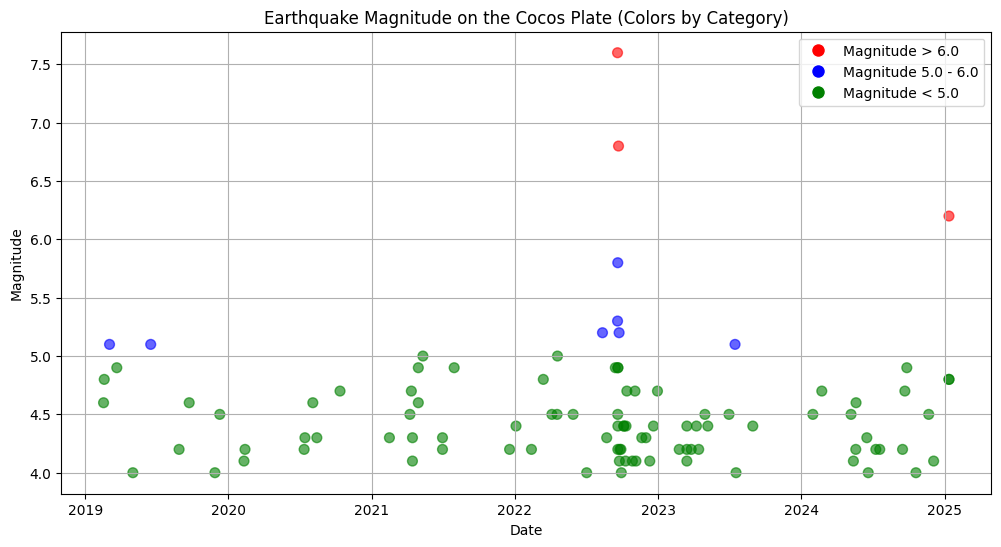

In [4]:
plt.figure(figsize=(12, 6))
colors = df['Magnitude'].apply(lambda x: 'red' if x > 6.0 else 'blue' if x > 5.0 else 'green')
plt.scatter(df['Time'], df['Magnitude'], c=colors, alpha=0.6, s=50, label="Earthquakes")
plt.title("Earthquake Magnitude on the Cocos Plate (Colors by Category)")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.grid()
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Magnitude > 6.0', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Magnitude 5.0 - 6.0', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Magnitude < 5.0', markerfacecolor='green', markersize=10)
])
plt.show()



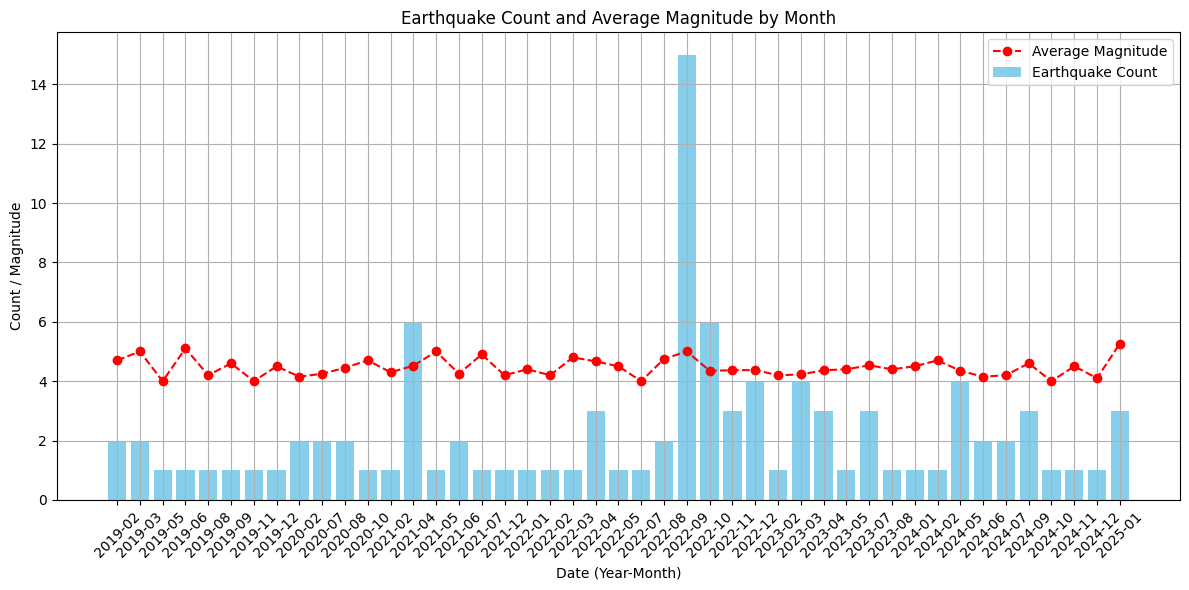

In [33]:
# Create additional data
df['YearMonth'] = df['Time'].dt.to_period('M')
counts = df.groupby('YearMonth')['Magnitude'].count()
averages = df.groupby('YearMonth')['Magnitude'].mean()

plt.figure(figsize=(12, 6))
plt.bar(counts.index.astype(str), counts, color='skyblue', label="Earthquake Count")
plt.plot(averages.index.astype(str), averages, color='red', marker='o', label="Average Magnitude", linestyle='--')
plt.xticks(rotation=45)
plt.title("Earthquake Count and Average Magnitude by Month")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Count / Magnitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



In [5]:
import folium
import webbrowser   

# Create a map centered on Mexico
map = folium.Map(location=[19.0, -99.0], zoom_start=5)

# Add earthquakes as points
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Coordinates'][1], row['Coordinates'][0]],  # Latitude and longitude
        radius=row['Magnitude'] * 2,
        color='red' if row['Magnitude'] > 6.0 else 'orange',
        fill=True,
        fill_opacity=0.7,
        popup=f"Magnitude: {row['Magnitude']}, Date: {row['Time']}"
    ).add_to(map)

# Save the map as an HTML file
map.save("earthquake_map.html")

webbrowser.open("earthquake_map.html")



True

[9158:9158:0120/235458.080913:ERROR:object_proxy.cc(576)] Failed to call method: org.freedesktop.ScreenSaver.GetActive: object_path= /org/freedesktop/ScreenSaver: org.freedesktop.DBus.Error.NotSupported: This method is not part of the idle inhibition specification: https://specifications.freedesktop.org/idle-inhibit-spec/latest/


Now, like the code before, we have added the `webbrowser` library to export an HTML file and view it on the web. This allows for more convenience in visualizing the earthquake data directly in a browser.


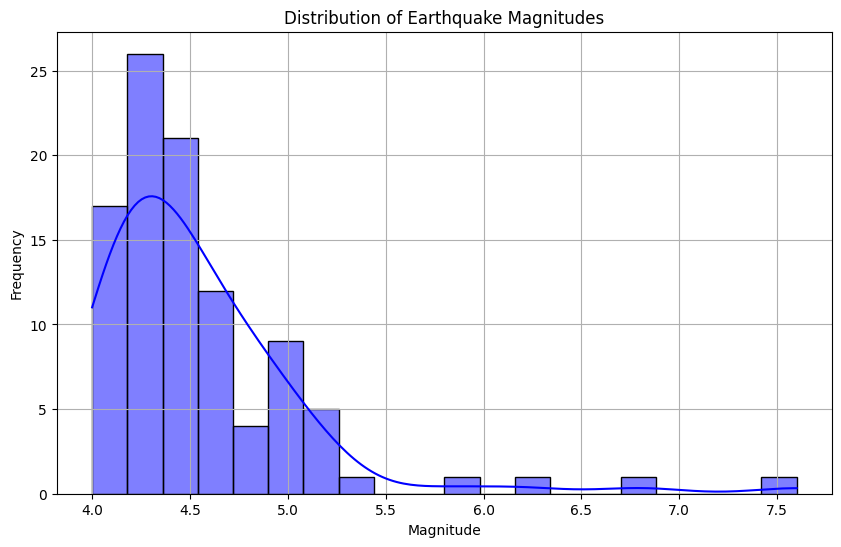

In [43]:
import seaborn as sns

# Histogram of magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], kde=True, color='blue', bins=20)
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In this section, we import the Seaborn library to enhance the visualization of the data. The `histplot` function is used to create a histogram of earthquake magnitudes. The KDE (Kernel Density Estimate) is added to show the smooth distribution of the data. The number of bins is set to 20 to better represent the frequency of different magnitude ranges.


In [6]:
import requests  # Import the requests library
import pandas as pd  # Import the pandas library

# Define the parameters for the API request
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"  # Base URL for the USGS Earthquake API
params = {
    "format": "geojson",  # Request the data in GeoJSON format
    "starttime": "2019-01-15",  # Start date for the data query
    "endtime": "2025-01-15",    # End date for the data query
    "orderby": "magnitude",     # Sort the results by magnitude
    "minlatitude": 17.5,        # Limit the region to the southern boundary of Mexico
    "maxlatitude": 20.0,        # Limit the region to the northern boundary of Mexico
    "minlongitude": -104.5,     # Limit the region to the western edge of the Cocos Plate
    "maxlongitude": -100.0,     # Limit the region to the eastern edge
    "minmagnitude": 4.0         # Include significant earthquakes
}

# Make the API request
response = requests.get(url, params=params)  # Perform a GET request to fetch the data
data = response.json()  # Parse the JSON response into a Python dictionary

# Process the data
df = pd.json_normalize(data['features'])  # Normalize the GeoJSON data into a pandas DataFrame
df['time'] = pd.to_datetime(df['properties.time'], unit='ms')  # Convert the time from milliseconds to datetime
df = df[['time', 'properties.mag', 'geometry.coordinates']]  # Select relevant columns
df.columns = ['Time', 'Magnitude', 'Coordinates']  # Rename the columns for clarity

# Extract depth (third element in the coordinates)
df['Depth'] = df['Coordinates'].apply(lambda x: x[2] if len(x) > 2 else None)

# Display a summary with the added depth column
print(df.head(30))  # Print the first 30 rows of the DataFrame


                      Time  Magnitude                   Coordinates   Depth
0  2022-09-19 18:05:08.217        7.6  [-102.9561, 18.4552, 26.943]  26.943
1  2022-09-22 06:16:09.459        6.8      [-102.9554, 18.2633, 20]  20.000
2  2025-01-12 08:32:50.161        6.2      [-103.3158, 18.5249, 34]  34.000
3  2022-09-20 08:17:10.977        5.8      [-103.6243, 18.3487, 16]  16.000
4  2022-09-19 19:30:39.868        5.3      [-103.8147, 18.4778, 10]  10.000
5  2022-09-23 18:25:59.283        5.2  [-103.6506, 18.5021, 41.467]  41.467
6  2022-08-12 08:17:26.497        5.2  [-100.8797, 18.4823, 71.653]  71.653
7  2019-06-16 17:25:23.138        5.1   [-101.7714, 18.5738, 60.71]  60.710
8  2023-07-16 13:44:34.199        5.1   [-100.8784, 18.3051, 62.74]  62.740
9  2019-03-03 15:25:53.559        5.1   [-101.4137, 18.4451, 49.22]  49.220
10 2022-04-19 12:44:08.076        5.0    [-101.864, 17.8597, 17.55]  17.550
11 2021-05-11 04:37:08.861        5.0   [-102.7126, 18.7614, 57.79]  57.790
12 2021-07-2

In this section, we make the same request to the USGS Earthquake API, specifying the region and other parameters like magnitude and date range. After processing the data, we normalize it into a pandas DataFrame and extract the time, magnitude, and coordinates. We then add a new column for the depth of each earthquake, which corresponds to the third element in the coordinates. This allows us to analyze the potential relationship between earthquake depth and magnitude, or also if we're just looking at outliers. The first rows of the DataFrame are displayed to summarize the data like the first section.


In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Magnitude', y='Depth', data=df, color='green', alpha=0.6)
plt.title("Relationship between Magnitude and Depth of Earthquakes")
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.grid(True)
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

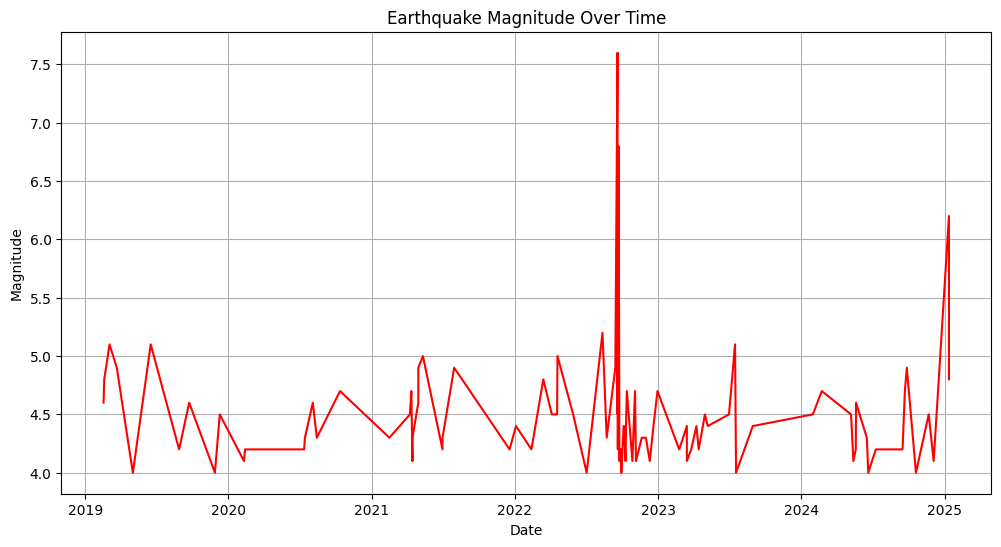

In [45]:
# Graph of earthquake magnitude over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Time'], y=df['Magnitude'], color='red')
plt.title("Earthquake Magnitude Over Time")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()



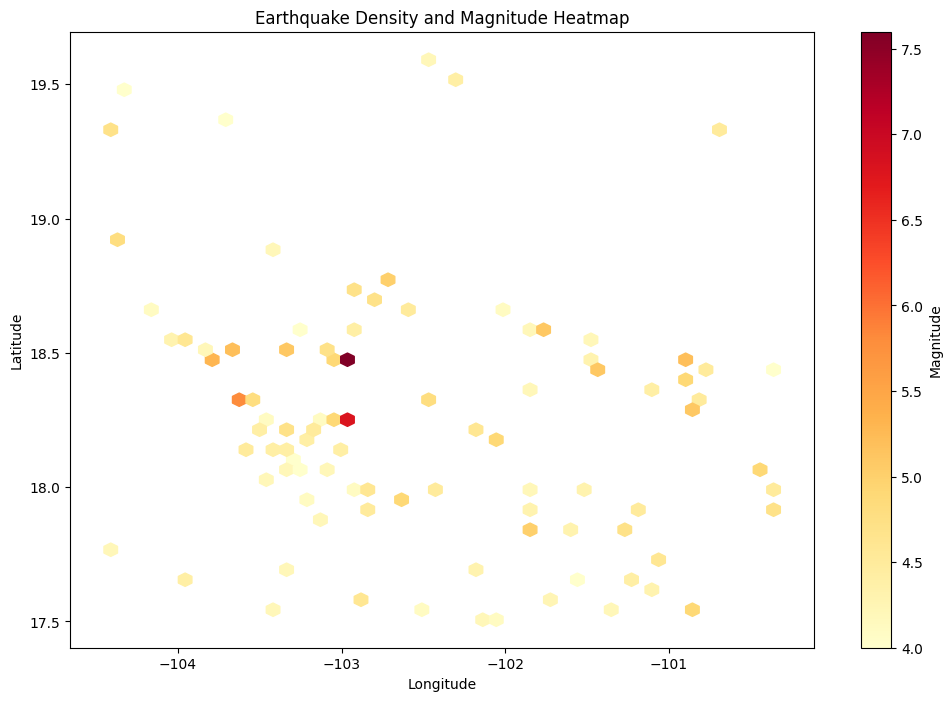

In [49]:
import requests  # Import the requests library
import pandas as pd  # Import the pandas library
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the parameters for the API request
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"  # Base URL for the USGS Earthquake API
params = {
    "format": "geojson",  # Request the data in GeoJSON format
    "starttime": "2019-01-15",  # Start date for the data query
    "endtime": "2025-01-15",    # End date for the data query
    "orderby": "magnitude",     # Sort the results by magnitude
    "minlatitude": 17.5,        # Limit the region to the southern boundary of Mexico
    "maxlatitude": 20.0,        # Limit the region to the northern boundary of Mexico
    "minlongitude": -104.5,     # Limit the region to the western edge of the Cocos Plate
    "maxlongitude": -100.0,     # Limit the region to the eastern edge
    "minmagnitude": 4.0         # Include significant earthquakes
}

# Make the API request
response = requests.get(url, params=params)  # Perform a GET request to fetch the data
data = response.json()  # Parse the JSON response into a Python dictionary

# Process the data
df = pd.json_normalize(data['features'])  # Normalize the GeoJSON data into a pandas DataFrame
df['time'] = pd.to_datetime(df['properties.time'], unit='ms')  # Convert the time from milliseconds to datetime
df = df[['time', 'properties.mag', 'geometry.coordinates']]  # Select relevant columns
df.columns = ['Time', 'Magnitude', 'Coordinates']  # Rename the columns for clarity

# Extract latitude and longitude
df['Latitude'] = df['Coordinates'].apply(lambda x: x[1] if len(x) > 1 else None)
df['Longitude'] = df['Coordinates'].apply(lambda x: x[0] if len(x) > 0 else None)

# Drop rows with missing values for coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a hexbin plot (heatmap-like visualization)
plt.figure(figsize=(12, 8))
plt.hexbin(df['Longitude'], df['Latitude'], C=df['Magnitude'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label="Magnitude")  # Color bar to show the magnitude scale

plt.title("Earthquake Density and Magnitude Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


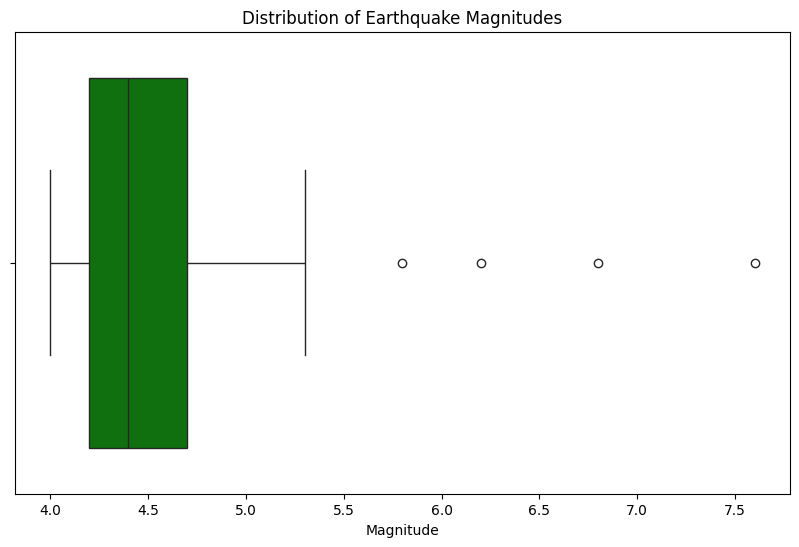

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Magnitude'], color='green')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.show()
